# IMDB data from 2006 to 2016

Анализ 1000 фильмов в базе данных IMBD за 2006-2016 гг

Датасет представляет информацию о 1000 популярных фильмах в базе данных IMDB за последние 10 лет. Данные взяты из сайта Kaggle: https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data

### Переменные

Rank - порядок рейтинга фильмов - количественная непрерывная, int

Title - название фильма - текстовые данные, object

Genre - жанр фильма - текстовые данные, object

Description - описание фильма - текстовые данные, object

Director - режиссер - текстовые данные, object

Actors - актеры - текстовые данные, object

Year - год - количественная дискретная (с 2006 по 2016), int

Runtime (Minutes) - продолжительность фильма - количественная непрерывная, int

Rating - оценка зрителей - от 0 до 10 - количественная непрерывная, float

Votes - голоса зрителей - количественная дискретная, int

Revenue (Millions) - доход фильма - количественная непрерывная, float

Metascore - оценка критиков - от 0 до 100 - количественная непрерывная, float

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
films = pd.read_csv('IMDB-Movie-Data.csv')
films

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


### Фильтрация 

**Предположим, что хорошая оценка для фильма - больше 7 от зрителей и больше 70 от критиков.**

In [16]:
films[(films['Rating'] >= 7) & (films['Metascore'] >= 70)].shape

(226, 12)

Делая такую фильтрацию, мы видим, что достаточно высокую оценку одновременно и от зрителей, и от критиков имеют только 226 фильмов из 1000, находящихся в датасете. 

**Поработаем с жанрами фильмов и посмотрим, сколько у нас фильмов в жанре Action.**

In [17]:
films[films['Genre'].str.contains('Action')].shape

(303, 12)

Почти 30% фильмов (303 фильма) из нашего датасета принадлежат жанру "Action". Посмотрим, сколько фильмов в этом жанре получили высокую оценку от зрителей.

In [12]:
films[(films['Genre'].str.contains('Action')) & (films['Rating'] >= 7)].shape

(114, 12)

114 фильмов (почти половина) из 303 фильмов в жанре 'Action' имеют высокую оценку (установленную нами: больше 7) от зрителей.

**Сколько фильмов имеют продолжительность больше 120 минут? (2 часа)**

In [18]:
films[films['Runtime (Minutes)'] > 120].shape

(289, 12)

Особо длинных фильмов в нашем датасете не так много. Продолжительность только 289 фильмов из 1000 превышает 2 часа

**Поработаем с режиссерами. Посмотрим, какой режиссер чаще всего встречается в наших данных и ставят ли критики высокие оценки его фильмам**

In [15]:
films['Director'].value_counts()

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

Чаще всего в наших данных встречается режиссер Ridley Scott. 

In [20]:
films[(films['Director'] == 'Ridley Scott') & (films['Metascore'] >= 70)].shape

(2, 12)

Только два фильма из 8, срежессированных Ридли Скоттом получили высокие оценки от критиков. Можно сделать первичный вывод о том, что, возможно, фигура режиссера не сильно важна в принятии решении о выставлении высоких баллов фильму. 

**Сколько в нашем датасете фильмов с доходом более 100 миллионов?**

In [21]:
films[films['Revenue (Millions)'] > 100].shape

(250, 12)

Лишь четверть фильмов в нашем датасете имеют доход более 100 миллионов долларов. Интересно посмотреть, ставили ли им высокие оценки зрители - ведь доход фильма во многом считается по сборам из кинотеатров. 

In [23]:
films[(films['Revenue (Millions)'] > 100) & (films['Rating'] >= 7)].shape

(151, 12)

Мы видим, что больше половины фильмов с доходом более 100 миллионов имеют высокую оценку от зрителей - 151 фильм из 250. 

### Сортировка

In [24]:
films.sort_values(by = 'Revenue (Millions)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.00,50.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0
677,678,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102,7.2,80415,0.01,44.0
321,322,Lovesong,Drama,The relationship between two friends deepens d...,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.4,616,0.01,74.0
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
977,978,Amateur Night,Comedy,Guy Carter is an award-winning graduate studen...,Lisa Addario,"Jason Biggs, Janet Montgomery,Ashley Tisdale, ...",2016,92,5.0,2229,NaN,38.0
978,979,It's Only the End of the World,Drama,"Louis (Gaspard Ulliel), a terminally ill write...",Xavier Dolan,"Nathalie Baye, Vincent Cassel, Marion Cotillar...",2016,97,7.0,10658,NaN,48.0
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0


В нашем датасете минимальный доход был у фильма A Kind of Murder. Доход составляет 0.00 долларов, при этом фильм имеет почти одинаковые по долям баллы от критиков (50) и зрителей (5.2). 

In [25]:
films.sort_values(by = 'Rating', ascending = False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0
647,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,NaN,57.0
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN


Самую высокую оценку от зрителей получил фильм The Dark Knight режиссера Кристофера Нолана. Фильм получил оценку 9.0 у зрителей, при этом достаточно высокую и от критиков - 82.0 

In [31]:
films.sort_values(by = ['Rating', 'Votes'], ascending = [True, False] )

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
647,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,NaN,57.0
968,969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


По данной сортировке видно, как распределяются голоса и оценки зрителей. Самая низкая оценка от зрителей у фильма Disaster Movie (1.9), следом идут фильмы Don't Fuck in the Woods и Dragonball Evolution с баллами 2.7, при этом за первый фильм проголосовало более 59000 человек, а за второй - всего 496. Такая же ситуация и у фильмов Inception и Dangal: у них одинаково высокий балл (8.8), но разница между количеством голосов составляет почти 1.5 миллиона  

### Частотные таблицы (столбцы)

In [2]:
films['Metascore'].value_counts()

72.0    25
68.0    25
66.0    25
64.0    24
57.0    23
        ..
19.0     1
98.0     1
16.0     1
91.0     1
11.0     1
Name: Metascore, Length: 84, dtype: int64

Частотная таблица по переменной оценки критиков показывает, что распределение мультимодальное: чаще встречаются оценки 72 балла, 68 и 66 баллов.Посмотрим, какие баллы встречались реже всего

In [14]:
f = films['Metascore'].value_counts()
f[f==1]

20.0     1
15.0     1
100.0    1
99.0     1
19.0     1
98.0     1
16.0     1
91.0     1
11.0     1
Name: Metascore, dtype: int64

Реже всего встречаются высокие оценки: от 98 до 100, а также довольно низкие - 11, 15,16

С помощью гистограммы проиллюстрируем распределение переменной оценок от критиков

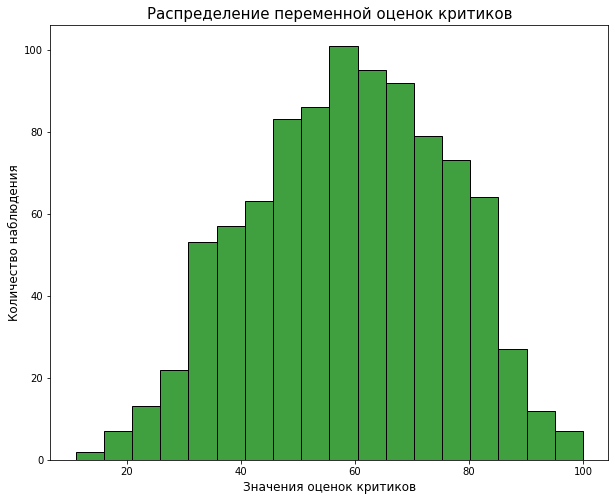

In [3]:
fig, ax = plt.subplots(figsize=[10,8])
sns.histplot(x = films['Metascore'], color = 'green')
ax.set_title('Распределение переменной оценок критиков', fontsize = 15)
ax.set_ylabel('Количество наблюдения', fontsize=12)
ax.set_xlabel('Значения оценок критиков', fontsize=12)
plt.show()

В целом распределение оценок критиков похоже на симметричное, хотя и видны небольшие выбросы

Посмотрим, какой доход получали фильмы в нашем датасете

In [15]:
films['Revenue (Millions)'].value_counts()

0.03      7
0.01      5
0.05      4
0.32      4
0.02      4
         ..
209.81    1
65.27     1
5.69      1
37.55     1
19.64     1
Name: Revenue (Millions), Length: 814, dtype: int64

Чаще всего в наших данных встречаются фильмы, получившие маленький доход: наиболее часто фильмы получали доход 30000 долларов (0.03 млн долларов), затем идут 10000, 50000, 32000 и 20000 долларов. Посмотрим, какие доходы встречались реже всего

In [25]:
f = films['Revenue (Millions)'].value_counts()
f[f==1]

150.06    1
162.00    1
56.72     1
162.59    1
3.08      1
         ..
209.81    1
65.27     1
5.69      1
37.55     1
19.64     1
Name: Revenue (Millions), Length: 776, dtype: int64

Таких доходов очень много, проиллюстрируем их через график

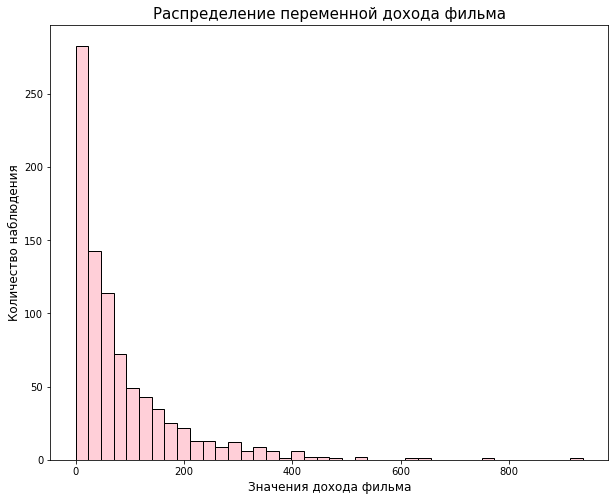

In [5]:
fig, ax = plt.subplots(figsize=[10,8])
sns.histplot(x = films['Revenue (Millions)'], color = 'pink', bins = 40)
ax.set_title('Распределение переменной дохода фильма', fontsize = 15)
ax.set_ylabel('Количество наблюдения', fontsize=12)
ax.set_xlabel('Значения дохода фильма', fontsize=12)
plt.show()

Для непрерывной переменной дохода мы выбрали гистограмму. Здесь распределение несимметричное, видны яркие выбросы: доход больше 200 миллионов.

Посмотрим на частотную таблицу по продолжительности фильмов

In [4]:
films['Runtime (Minutes)'].value_counts()

108    31
100    28
117    27
118    26
106    26
       ..
172     1
164     1
163     1
159     1
145     1
Name: Runtime (Minutes), Length: 94, dtype: int64

Чаще всего встречаются фильмы с нормальной продолжительностью - до 120 минут. Посмотрим, а какие встречаются меньше всего

In [27]:
f = films['Runtime (Minutes)'].value_counts()
f[f==1]

191    1
66     1
82     1
160    1
187    1
170    1
166    1
172    1
164    1
163    1
159    1
145    1
Name: Runtime (Minutes), dtype: int64

Меньше всего встречаются несколько фильмы со слишком маленькой продолжительностью (до 90 минут) и слишком большой - больше 120 минут. Вся информация по продолжительности взята из источника:  https://kz.kursiv.media/2023-02-09/kak-i-zachem-rezhissery-zastavlyayut-zritelya-skuchat-pri-prosmotre/

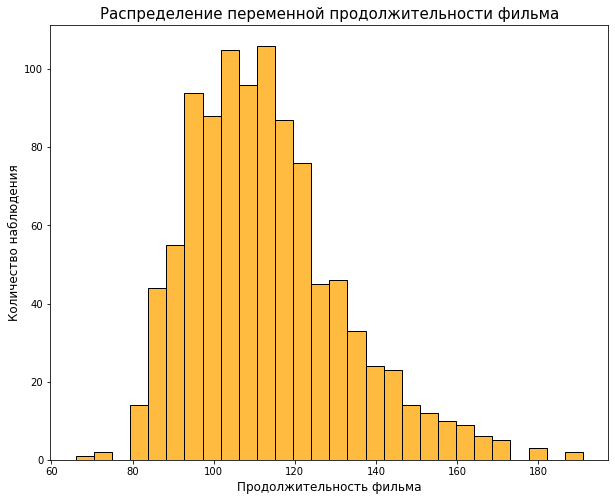

In [8]:
fig, ax = plt.subplots(figsize=[10,8])
sns.histplot(x = films['Runtime (Minutes)'], color = 'orange')
ax.set_title('Распределение переменной продолжительности фильма', fontsize = 15)
ax.set_ylabel('Количество наблюдения', fontsize=12)
ax.set_xlabel('Продолжительность фильма', fontsize=12)
plt.show()

Для еще одной непрерывной переменной - продолжительности фильма - мы также выбрали гистограмму. Она показала относительно нормальное распределение, в котором есть незначительные аномально низкие и высокие значения. 

In [29]:
films.groupby('Year')['Votes'].sum().sort_values(ascending = False)

Year
2014    19985162
2013    19933518
2012    18254470
2011    15169789
2010    15166939
2015    14697230
2016    14431751
2008    14326280
2009    13044813
2007    12949545
2006    11848758
Name: Votes, dtype: int64

Мы создали частотную таблицу по суммарному количеству голосов зрителей за фильмы с 2006 по 2016 год. БОльшее количество голосов от зрителей приходится на 2012-2014 годы. В целом зрители за остальные годы голосовали с одинаковой частотностью - +- 1.5 миллиона человек

### Частотные таблицы (отфильтрованные данные)


In [7]:
films[films['Genre'].str.contains('Action')]['Metascore'].value_counts()

60.0    9
39.0    9
64.0    9
57.0    9
66.0    9
       ..
67.0    1
20.0    1
26.0    1
25.0    1
77.0    1
Name: Metascore, Length: 65, dtype: int64

Жанрам экшн чаще всего ставили следующие оценки: 60, 66, 57 и 64, а также 39. Посмотрим, а какие оценки ставили реже

In [30]:
f = films[films['Genre'].str.contains('Action')]['Metascore'].value_counts()
f[f==1]

23.0    1
80.0    1
85.0    1
90.0    1
67.0    1
20.0    1
26.0    1
25.0    1
77.0    1
Name: Metascore, dtype: int64

Реже всего фильмам в жанре экшн ставили высокие оценки (80,85, 90 баллов), а также очень низкие - от 20 до 25 баллов. 

Нам интересно посмотреть, сколько фильмов получили достаточно высокий доход (более 100 млн долларов) в каждый год.

In [6]:
films[films['Revenue (Millions)'] > 100]['Year'].value_counts()

2016    32
2014    31
2013    28
2015    25
2012    22
2010    22
2008    21
2011    20
2009    19
2007    16
2006    14
Name: Year, dtype: int64

Самое большое количество высокодоходных фильмов приходится на 2016 год (32 фильма). Следом идут 2014 (31 фильм), 2013(28 фильмов). Меньше всего таких фильмов приходится на 2006-2007 годы (14 и 16 фильмов соответственно)

In [11]:
films[films['Runtime (Minutes)'] > 120]['Rating'].value_counts()

7.1    22
7.8    22
8.1    17
7.0    16
7.5    16
6.7    15
7.6    15
7.2    15
7.3    14
7.4    13
7.9    11
6.5     9
6.9     8
8.0     8
6.4     7
6.6     7
7.7     7
6.2     7
8.2     6
6.8     6
8.5     5
6.3     4
6.0     4
5.9     4
8.3     3
5.7     3
6.1     3
8.4     3
5.8     3
5.5     2
5.2     2
8.8     2
9.0     1
3.7     1
4.1     1
5.3     1
5.4     1
8.6     1
4.7     1
3.2     1
4.9     1
4.3     1
Name: Rating, dtype: int64

Мы посмотрели распределение зрительских оценок долгим фильмам (более 2 часов) с помощью частотной таблицы. Распределение бимодальное: чаще всего встречаются оценки 7.1 и 7.8. В целом большинство фильмов получили оценки от 7 до 8. Реже всего ставилась оценка 9 и 8.6, а также довольно низкие баллы от 3 до 4 (см в таблице) 

### Создание новой переменной

Создадим переменную, в которой будет находиться статус фильма в зависимости от его продолжительности: нормальная продолжительность(от 90 до 120 минут - это средняя продолжительность всех фильмов, нормальная для них: https://kz.kursiv.media/2023-02-09/kak-i-zachem-rezhissery-zastavlyayut-zritelya-skuchat-pri-prosmotre/), короткий (до 90 минут), долгий(больше 120 минут). 

In [110]:
def runtime_periodization(runtime):
    if runtime < 90:
        return 'Короткий'
    elif runtime >= 90 and runtime <= 120:
        return 'Нормальная продолжительность'
    else:
        return 'Долгий'

In [111]:
films['Runtime_periodization'] = films['Runtime (Minutes)'].apply(runtime_periodization)

### МЦТ 

Посчитаем меры центральной тенденции для наших переменных

**Доход фильмов - непрерывная переменная, можем посчитать все три МЦТ**

In [75]:
films['Revenue (Millions)'].mean()

82.95637614678897

В среднем фильмы получали доход в 83 миллиона долларов с округлением

In [54]:
films['Revenue (Millions)'].median()

47.985

50% фильмов имели доход меньше 48 миллионов долларов с округлением. Видим, что медиана и среднее отличаются друг от друга, причем среднее больше медианы, получается, есть экстремально высокие выбросы, влияющие на среднее. Раннее график по этой переменной иллюстрировал нам то же самое. Посмотрим на выбросы в этой переменной дальше

In [55]:
films['Revenue (Millions)'].mode()

0    0.03
dtype: float64

Чаще всего в наших данных встречается доход в 30000 долларов (0.03 миллиона)

**Оценка фильмов критиками  - непрерывная переменная, можем посчитать все три МЦТ**

In [56]:
films['Metascore'].mean()

58.98504273504273

В среднем критики ставили фильмам 59 баллов с округлением. Это больше половины от 100, получается, критики ставили "средние" оценки

In [57]:
films['Metascore'].median()

59.5

50% фильмов получили от критиков оценку меньше 59.5 баллов. Среднее и медиана не сильно отличаются друг от друга, возможно, есть небольшие экстремально низкие значения (среднее меньше медианы)

In [58]:
films['Metascore'].mode()

0    66.0
1    68.0
2    72.0
dtype: float64

Распределение оценок критиков мультимодальное, есть три моды. Чаще всего критики ставили оценки 66,68,72 балла. 

**Оценка фильмов зрителями - непрерывная переменная, можем посчитать все три МЦТ**

In [47]:
films['Rating'].mean()

6.723200000000003

В среднем зрители ставили фильмам 6.7 баллов с округлением. 

In [48]:
films['Rating'].median()

6.8

50% фильмов получили от зрителей оценку меньше 6.8. Различие между средним и медианой очень маленькое (0.1), можно сделать вывод, что cильных выбросов в целом нет. 

In [49]:
films['Rating'].mode()

0    7.1
dtype: float64

Чаще всего зрители ставили оценку 7.1 

**Количество голосов - дискретная, рассчитаем медиану и моду**

In [89]:
films['Votes'].median()

110799.0

Меньше 110799 голосов получили 50% фильмов

In [91]:
films['Votes'].mode()

0      291
1     1427
2    97141
dtype: int64

Распределение голосов зрителей также мультимодальное. Чаще всего голосовал 291 человек, 1427 или 97141

**Продолжительность фильмов - непрерывная, рассчитаем все три МЦТ**

In [44]:
films['Runtime (Minutes)'].mean()

113.172

В среднем фильмы длятся 113 минут с округлением

In [45]:
films['Runtime (Minutes)'].median()

111.0

50% фильмов длятся меньше 111 минут

In [94]:
films['Runtime (Minutes)'].mode()

0    108
dtype: int64

Чаще всего в данных встречаются фильмы продолжительностью в 108 минут

**Рассмотрим моды для некоторых номинальных переменных (другие МЦТ использовать нельзя)**

In [36]:
films['Director'].mode()

0    Ridley Scott
dtype: object

Чаще всего в наших встречаются фильмы, режиссером которых является Ридли Скотт. Посмотрим, сколько его фильмов есть в данных

In [37]:
films['Director'].value_counts()

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

8 фильмов в наших данных срежиссированы Ридли Скоттом

In [34]:
films['Genre'].mode()

0    Action,Adventure,Sci-Fi
dtype: object

Наиболее часто встречающийся жанр фильмов в наших данных - Экшн, с приключенческим и научпоп сюжетом. Посмотрим, сколько таких фильмов есть в данных

In [95]:
films['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

50 фильмов принадлежат этому жанру. 

### Ящик с усами

Сделаем визуализацию выбросов для дохода фильмов (там наблюдалось большое различие между средним и медианой), а также оценками от зрителей - там наблюдалось меньшее различие между средним и медианой, интересно посмотреть, есть ли там выбросы

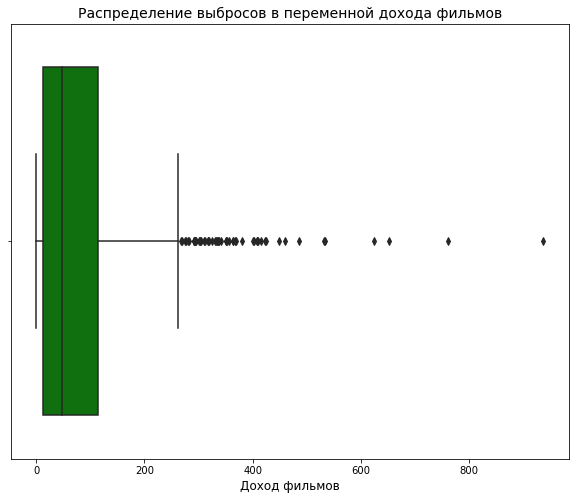

In [19]:
fig, ax = plt.subplots(figsize=[10,8])
sns.boxplot(x=films['Revenue (Millions)'], color = 'green')
ax.set_title('Распределение выбросов в переменной дохода фильмов', fontsize = 14)
ax.set_xlabel('Доход фильмов', fontsize=12)
plt.show()

В переменной дохода нижняя граница значений равно 0, а верхняя - примерно 250, и выбросы (аномальные значения) есть после верхней границы, их значения начинаются от 250 и достигают значений больше 800. За счёт аномальных значений среднее арифметическое и было такое большое по сравнению с медианой.

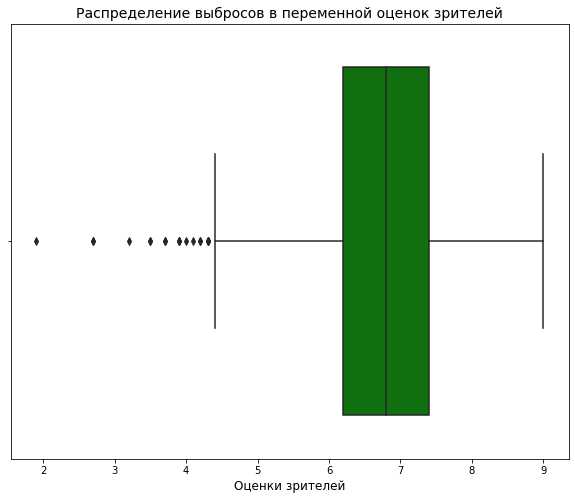

In [20]:
fig, ax = plt.subplots(figsize=[10,8])
sns.boxplot(x=films['Rating'], color = 'green')
ax.set_title('Распределение выбросов в переменной оценок зрителей', fontsize = 14)
ax.set_xlabel('Оценки зрителей', fontsize=12)
plt.show()

В переменной оценок зрителей нижняя граница находится между оценками 4 и 5, а верхняя - на 9. При этом выбросы есть, несмотря на то, что среднее не сильно отличалось от медианы, хоть и было меньше. Экстремальные значения находятся за нижней границей, достигая значения от 4 до 2. 

### Количество пропущенных значений 

Перед тем, как рассчитать выбросы в переменной дохода, посмотрим, есть ли там и в других переменных пропущенные значения

In [97]:
films.isna().sum()

Rank                       0
Title                      0
Genre                      0
Description                0
Director                   0
Actors                     0
Year                       0
Runtime (Minutes)          0
Rating                     0
Votes                      0
Revenue (Millions)       128
Metascore                 64
Runtime_periodization      0
dtype: int64

Пропущенные значения есть в переменной Revenue (Millions) - дохода фильмов - 128 значений. А также в Metascore - оценки критиков - 64 значения 

### Расчет выбросов

Мы хотим рассчитать выбросы в переменной дохода, так как там есть пропущенные значения, в расчете мы от них избавимся. 

**По межквартильному отклонению**

In [13]:
q1 = np.percentile(films[films['Revenue (Millions)'].isnull() == False]['Revenue (Millions)'], 25)
q3 = np.percentile(films[films['Revenue (Millions)'].isnull() == False]['Revenue (Millions)'], 75)
iqr = q3 - q1
bottom_line = q1 - 1.5*iqr
upper_line =  q3 + 1.5*iqr
bottom_line, upper_line

(-137.3975, 264.38250000000005)

Нижняя граница является отрицательным числом, так что за нижней границей нет выбросов, а вот верхняя граница равно 264 с округлением, за ней будут выбросы, посчитаем их количество через фильтрацию

In [130]:
films[films['Revenue (Millions)'] > upper_line].shape

(55, 14)

55 выбросов находятся в переменной дохода, если считать по межквартильному размаху. Теперь рассчитаем выбросы по стандартному отклонению, если предположить, что выбросами будут считаться наблюдения, которые отличаются от среднего на 2 стандартных отклонения и более

In [30]:
mean = films['Revenue (Millions)'].mean()
std = films['Revenue (Millions)'].std()
bottomline = mean - 2*std
upperline = mean + 2*std
print(bottomline, upperline)

-123.5507048030605 289.4634570966384


Нижняя граница вновь отрицательная, следовательно, за ней выбросов нет. Верхняя граница равна 289 с округлением, больше чем была по межквартильному размаху. Посчитаем количество выбросов от верхней границы. 

In [106]:
films[films['Revenue (Millions)'] >= upperline].shape

(49, 13)

49 выбросов находятся в переменной дохода, если считать по стандартному отклонению. Различие в подсчетах с iqr и std не сликшом большое, но стандартное отклонение "отловило" меньше выбросов. Можно сказать, что способ со стандартным отклонением расширяет значения границ, так как здесь мы используем среднее арифметическое, которое зависит от выбросов и может некоторые из них (которые как раз таки отличаются на 2 стандартных отклонения) не уловить, поэтому они и не войдут в общее число выбросов. Таким образом, нам кажется, что способ с межквартильным размахом лучше, так как нет факторов, зависящих от выбросов. 

**Выбросов не так много, поэтому заменим их на медиану. Возьмем расчет по IQR, так как он показал больше выбросов. Создадим новую переменную, где произведем замену**

In [14]:
films['Revenue_median'] = films['Revenue (Millions)'].apply(lambda value: films['Revenue (Millions)'].median() if value > upper_line else value)

In [142]:
films['Revenue_median'].mean()

62.080166284403695

In [143]:
films['Revenue_median'].median()

47.9675

In [144]:
films['Revenue_median'].mode()

0    47.985
dtype: float64

При замене выбросов на медиану среднее продолжило быть больше медианы (среднее 62 с округлением, медиана 48 с округлением), но при этом среднее все же стало меньше по сравнению с тем, что было до замен (до замены среднее было 83 с округлением). Это произошло из-за замены выбросов, которые и делали среднее таким большим. Неудивительным стало то, что чаще всего теперь в данных встречается значение медианы до замен. (этим числом мы и заменяли выбросы)

### Корреляционная матрица 

Построим корреляционную матрицу по всем непрерывным переменным, которые у нас есть: доход фильма, оценка от зрителей, оценка от критиков, продолжительность фильма

In [6]:
films[['Runtime (Minutes)', 'Rating', 'Revenue (Millions)', 'Metascore']].corr()

,Runtime (Minutes),Rating,Revenue (Millions),Metascore
Runtime (Minutes),1.000000,0.392214,0.267953,0.211978
Rating,0.392214,1.000000,0.217654,0.631897
Revenue (Millions),0.267953,0.217654,1.000000,0.142397
Metascore,0.211978,0.631897,0.142397,1.000000


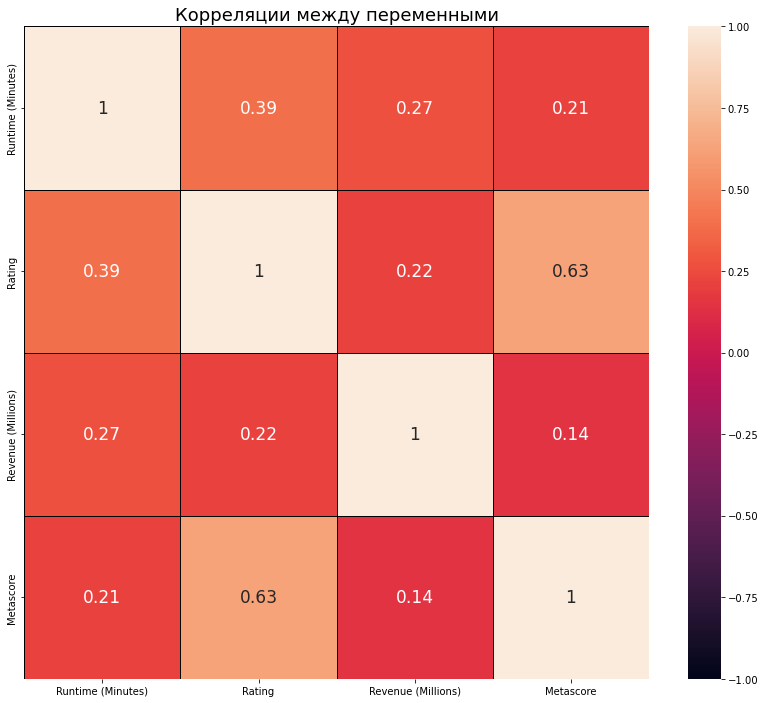

In [22]:
fig, ax = plt.subplots(figsize=[14,12])
ax.set_title('Корреляции между переменными', fontsize=18)
sns.heatmap(films[['Runtime (Minutes)', 'Rating', 'Revenue (Millions)', 'Metascore']].corr(), annot = True, linecolor = 'black', linewidth = 0.75, annot_kws = {'size': 17}, cmap= 'rocket', vmin=-1, vmax = 1)
plt.show()

В целом высоких по силе корреляций у нас нет. Все коэффициенты меньше 0.7 (не считаем единички, это погрешность матрицы). При этом все связи положительные - отрицательных коэффициентов нет. 
Проинтерпретируем все корреляции:

**Продолжительность фильма и оценка зрителей (Runtime (Minutes)/Rating). Коэффициент равен 0.39, это умеренная связь, в целом существует линейная зависимость. Интересно, что коэффициент положительный и зависимость прямая, это можно интерпретировать как "чем дольше длится фильм, тем больше оценка зрителя", хотя ранее мы предполагали скорее обратную зависимость.**

In [1]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = films['Runtime (Minutes)'], y = films['Rating'], alpha=0.7, c = 'firebrick')
ax.set_title('Зависимость оценки зрителей от продолжительности фильма', fontsize=15)
ax.set_xlabel('Продолжительность фильма', fontsize=12)
ax.set_ylabel('Оценка зрителей', fontsize=12)
plt.show()

NameError: name 'plt' is not defined

На графике рассеяния нет сильного хаотичного распределения точек, в целом есть уплотнений большинства значений в диапазоне от 80 до 120 минут (таких значений у нас было больше всего по ранним расчетам), видны также выбросы - меньше 80 минут и больше 140. По такому графику действительно можно судить об умеренной связи, так как движения в линию нет, как и хаотичного распределения. 

**Продолжительность фильма и доход фильма (Runtime (Minutes)/Revenue (Millions). Коэффициент корреляции равен 0.27. Это слабая связь, сложно говорить о линейной зависимости между двумя переменными - скорее всего доход фильма мало зависит от его продолжительности**

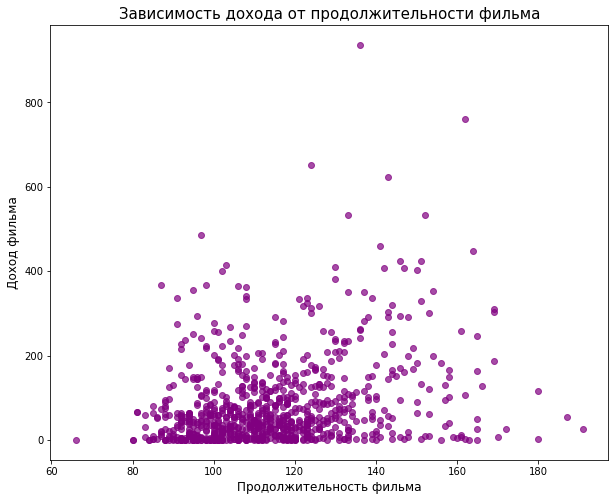

In [41]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = films['Runtime (Minutes)'], y = films['Revenue (Millions)'], alpha=0.7, c = 'purple')
ax.set_title('Зависимость дохода от продолжительности фильма', fontsize=15)
ax.set_xlabel('Продолжительность фильма', fontsize=12)
ax.set_ylabel('Доход фильма', fontsize=12)
plt.show()

На графике рассеяния видим слабую связь, большинство значений уплотнено у дохода со значением 0, видны выбросы по переменной дохода - более 400 млн. Связь нелинейная. 

Посмотрим, как изменится корреляция, если посмотреть ее с переменной дохода без выбросов. 

Коэффициент равен: 0.17294124501525182


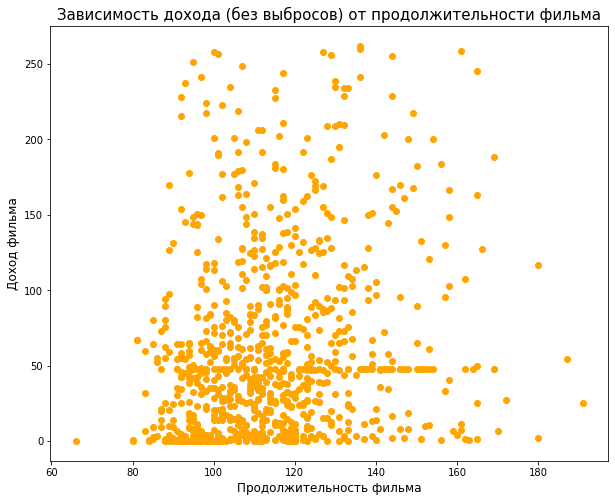

In [40]:
corr = films['Runtime (Minutes)'].corr(films['Revenue_median'])
print(f'Коэффициент равен: {corr}')
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x=films['Runtime (Minutes)'], y = films['Revenue_median'], c = 'orange')
ax.set_title('Зависимость дохода (без выбросов) от продолжительности фильма', fontsize=15)
ax.set_xlabel('Продолжительность фильма', fontsize=12)
ax.set_ylabel('Доход фильма', fontsize=12)
plt.show()

Коэффициент стал еще меньше - 0.17, ушли лишь аномально высокие выбросы, нулевые значения остались. Зависимости все так же не наблюдается

**Продолжительность фильма и оценка критиков (Runtime (Minutes)/Metascore). Коэффициент корреляции равен 0.21. Это слабая связь, сложно говорить о зависимости между двумя переменными - скорее всего оценка критиков не зависит от продолжительности фильма**

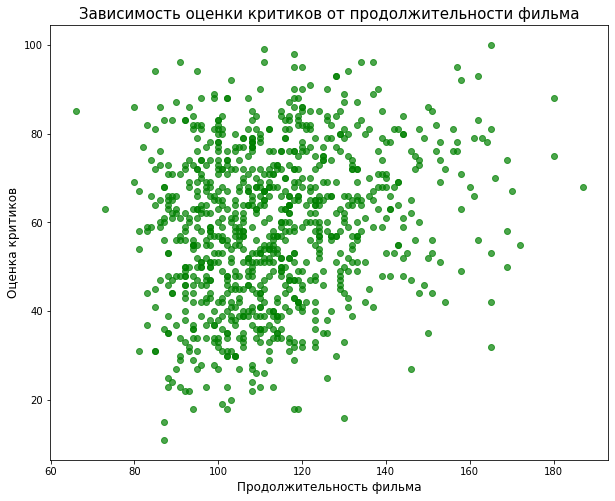

In [39]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x=films['Runtime (Minutes)'], y = films['Metascore'], alpha=0.7, c = 'green')
ax.set_title('Зависимость оценки критиков от продолжительности фильма', fontsize=15)
ax.set_xlabel('Продолжительность фильма', fontsize=12)
ax.set_ylabel('Оценка критиков', fontsize=12)
plt.show()

На графике рассеяния мы видим хаотичное распределение значений, что говорит о слабой связи, причем большинство значений все так же уплотнено в промежутке от 80 до 120. 

**Оценка критиков и доход фильма (Metascore)/Revenue (Millions)). Коэффициент корреляции равен 0.14. Это самая слабая корреляция в наших данных, опять сложно говорить о зависимости между двумя переменными - скорее всего доход фильма, то есть какое количество людей посмотрели фильм в кинотеатре - вовсе не зависит от оценки критиков.**

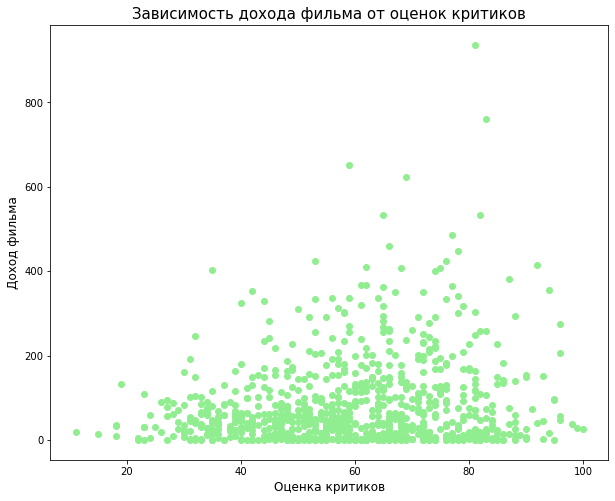

In [38]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x=films['Metascore'], y = films['Revenue (Millions)'], c = 'lightgreen')
ax.set_title('Зависимость дохода фильма от оценок критиков', fontsize=15)
ax.set_xlabel('Оценка критиков', fontsize=12)
ax.set_ylabel('Доход фильма', fontsize=12)
plt.show()

График рассеяния здесь похож на график с продолжительностью фильма. Вновь видим, что большинство значений находятся у нуля по доходу. Проводить эксперимент с переменной без выбросов не будем. 

**Оценка критиков и оценка зрителей (Metascore/Rating). Коэффициент корреляции между оценками самая высокая - 0.63. Это заметная положительная связь, здесь смело можно говорить о том, что существует связь между переменными оценок критиков и оценкой зрителей. Возможно дело в том, что зрители и критики примерно одинаково голосуют - только в своих шкалах (критики до 100, зрители до 10).**

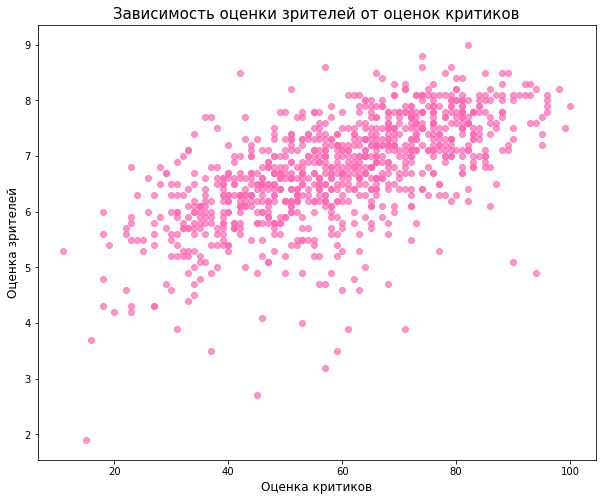

In [37]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x=films['Metascore'], y = films['Rating'], alpha=0.7, c = 'hotpink')
ax.set_title('Зависимость оценки зрителей от оценок критиков', fontsize=15)
ax.set_xlabel('Оценка критиков', fontsize=12)
ax.set_ylabel('Оценка зрителей', fontsize=12)
plt.show()

Действительно, на графике четко видна довольная сильная связь между переменными: идет выстраивание в линию и зависимость действительно положительная (идет слева направо). Получается, чем больше оценка от критиков, тем больше и оценка от зрителей. 

**Доход фильмов и оценка зрителей (Revenue (Millions)/Rating). Коэффициент корреляции  равен 0.22. Это слабая положительная связь, сложно говорить о зависимости между доходом фильма и рейтингом от зрителей. Скорее всего эти значения мало связаны, так как зрители могут ставить и плохие оценки, если пришли на фильм в кинотеатре.**

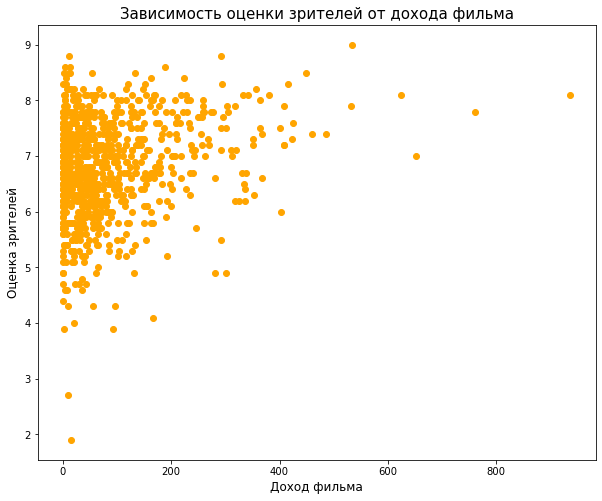

In [36]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x=films['Revenue (Millions)'], y = films['Rating'], c = 'orange')
ax.set_title('Зависимость оценки зрителей от дохода фильма', fontsize=15)
ax.set_xlabel('Доход фильма', fontsize=12)
ax.set_ylabel('Оценка зрителей', fontsize=12)
plt.show()

Вновь на графике рассеяния с переменной дохода видим уплотнение значений у дохода 0. Это серьезный выброс, а возможно, так в наших данных отмечены пропуски. В любом случае это создает нелинейную связь. При этом аномально высокие выбросы у дохода, на удивление, выстраивают довольно линейную связь. (Что и понятно: если у фильма огромный доход, скорее всего, фильм очень популярный и у него будут хорошие отклики. Допустим, если это блокбастер от Марвел - то все фанаты поставят этому фильму высокие баллы. Проверим эту гипотезу)

In [37]:
films[films['Revenue (Millions)'] > 400].groupby('Title')['Rating'].sum()

Title
Avatar                                        7.8
Avengers: Age of Ultron                       7.4
Captain America: Civil War                    7.9
Finding Dory                                  7.4
Frozen                                        7.5
Iron Man Three                                7.2
Jurassic World                                7.0
Pirates of the Caribbean: Dead Man's Chest    7.3
Rogue One                                     7.9
Star Wars: Episode VII - The Force Awakens    8.1
The Avengers                                  8.1
The Dark Knight                               9.0
The Dark Knight Rises                         8.5
The Hunger Games                              7.2
The Hunger Games: Catching Fire               7.6
Toy Story 3                                   8.3
Transformers: Revenge of the Fallen           6.0
Name: Rating, dtype: float64

Видим, что фильмы с большим доходом - чаще всего относятся к франшизам - Аватар, Звездные войны, Трансформеры, Мстители. У этих фильмов большой фандом - поэтому высокие доходы и высокая оценка от зрителей - выше 7